<h1>Regressão Linear - Projeto.</h1>

In [44]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})
#plt.figure(figsize=(11.7,8.27))

In [45]:
#Dados https://www.kaggle.com/srolka/ecommerce-customers
clientes = pd.read_csv('Ecommerce Customers.csv')

In [46]:
clientes.head(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


In [47]:
clientes.describe().round(2)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.00,500.00,500.00,500.00,500.00
mean,33.05,12.05,37.06,3.53,499.31
std,0.99,0.99,1.01,1.00,79.31
min,29.53,8.51,33.91,0.27,256.67
25%,32.34,11.39,36.35,2.93,445.04
50%,33.08,11.98,37.07,3.53,498.89
75%,33.71,12.75,37.72,4.13,549.31
max,36.14,15.13,40.01,6.92,765.52


In [48]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


<h1>Análise de dados exploratória</h1>

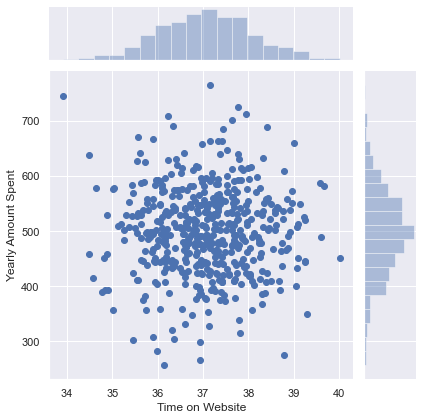

In [49]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=clientes)

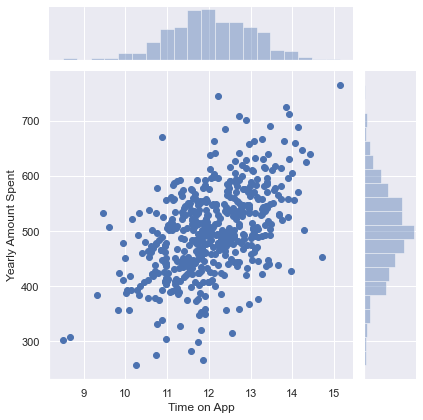

In [50]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=clientes)

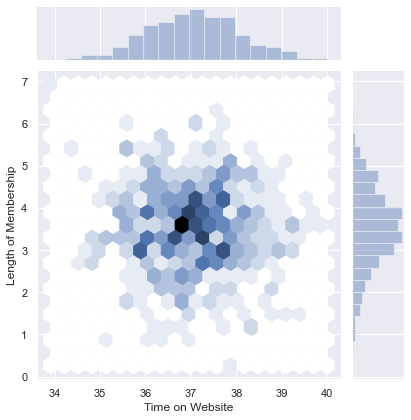

In [51]:
sns.jointplot(x='Time on Website', y='Length of Membership', data=clientes, kind='hex')

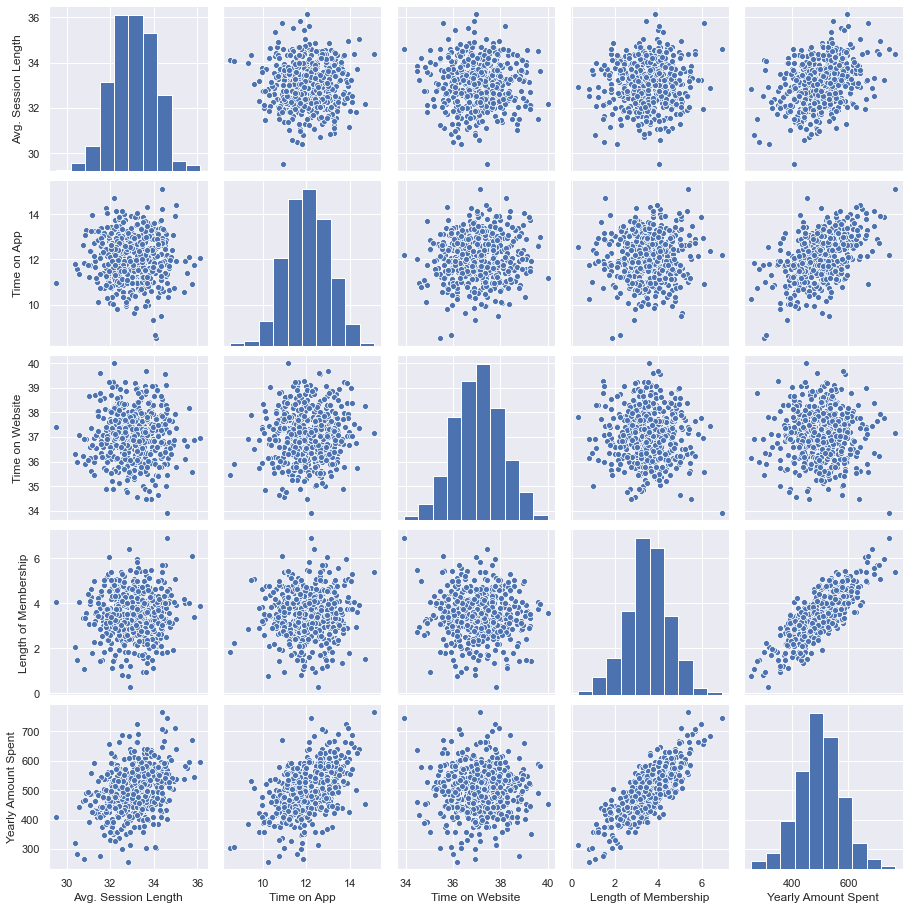

In [52]:
sns.pairplot(clientes)

sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=clientes)

<h1>Treinando e testando os dados</h1>

In [53]:
y=clientes['Yearly Amount Spent']

In [68]:
X=clientes[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]

In [69]:
from sklearn.model_selection import train_test_split

<h1>Treinando modelo</h1>

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
lm = LinearRegression()

In [75]:
%time lm.fit(X_train,y_train)

CPU times: user 7.21 ms, sys: 0 ns, total: 7.21 ms
Wall time: 6.82 ms


LinearRegression()

In [76]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

<h1>Previsão de dados de teste</h1>

In [77]:
prediction = lm.predict(X_test)

Text(0, 0.5, 'Predicted y')

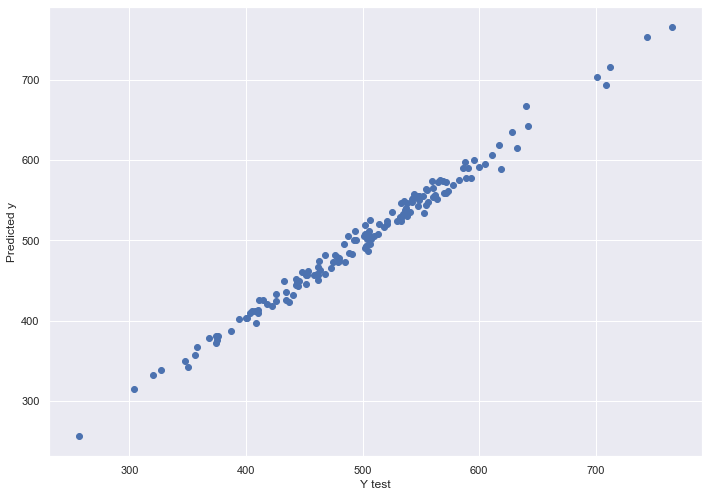

In [79]:
plt.scatter(y_test, prediction)
plt.xlabel('Y test')
plt.ylabel('Predicted y')

<h1>Avaliando o modelo.</h1>

In [80]:
from sklearn import metrics

In [82]:
print('MAE', metrics.mean_absolute_error(y_test, prediction))
print('MSE', metrics.mean_squared_error(y_test, prediction))
print('RMSE', np.sqrt(metrics.mean_squared_log_error(y_test, prediction)))

MAE 7.228148653430815
MSE 79.81305165097429
RMSE 0.017753763103974


<h1>Resíduos</h1>

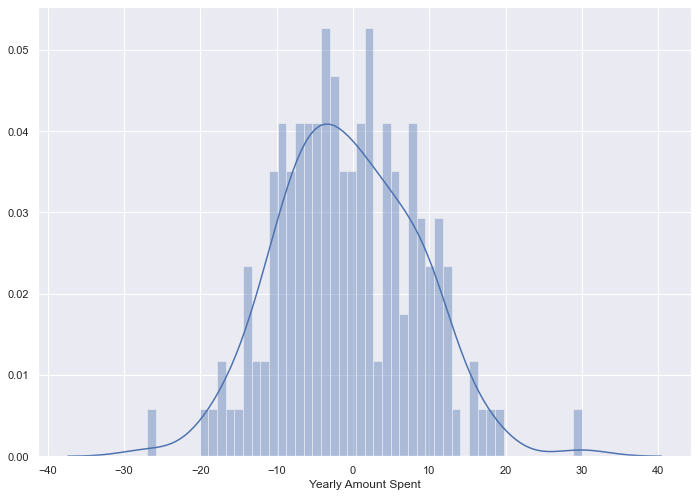

In [83]:
sns.distplot((y_test-prediction),bins=50)

In [84]:
coef = pd.DataFrame(lm.coef_, X.columns, columns=['Coefs'])
coef

,Coefs
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
